## 로지스틱 회귀분석 (이진분류 알고리즘)
### A. LOGIT(Logistic Regression)의 기본 배경
- 1) 분류를 하는데 있어서 가장 흔한 경우는 이분법을 기준으로 분류하는 경우임

    (예1) 특정 고객이 물건을 살 것인가? (0), 말 것인가? (1)
    
    (예2) 어떤 기업이 부도가 날 것인가? (0), 말 것인가? (1)
    
    (예3) 내일 컴퓨터가 고장이 날 것인가? (0), 말 것인가? (1)

- 2) 이항 확률을 가진 종속변수를 통계적으로 설명하고자 할 때, 일반적인 회귀 분석은 적용하기에 어려움이 있음

- 3) 로지스틱 회귀분석은 값이 연속적인 값을 가지더라도, 로지스틱 함수의 결과값은 0과 1사이의 값을 갖도록 설계 되어 있기 때문에 이분법적인 분류 문제를 해결하는 모형으로 적합
 
### B. LOGIT의 적용분야
- 
적용분야 : 기업 부도 예측, 주가-환율-금리 등의 Up/Down 예측- 

가능한 Software : SAS, SPSS 등 대부분의 통계 

### 1) 오즈비(# odds rat)
- 성공 # 성공확률과 실패 확률의 비율을 나타
- p / (1-p)  p=성공확률
- p가 0에서 1까지 증가할 때 오즈비는 처음에 천천히 증가하지만 p가 1에 가까워지면 급격히 증가함 급격히 증가함패키지

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(10)

probs =np.arange(0, 1, 0.01) 
len(probs)

100

In [2]:
probs[:10]

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09])

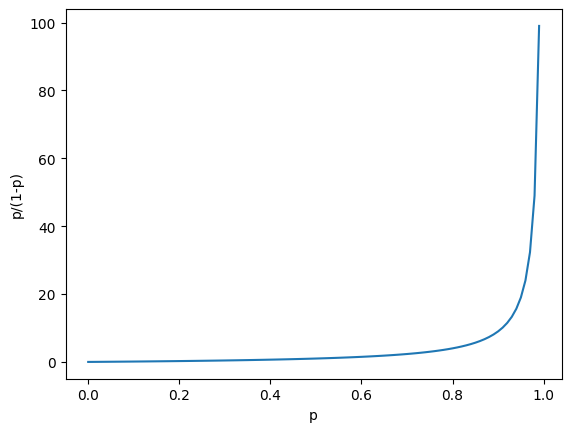

In [3]:
odds = [p/(1-p) for p in probs]
plt.plot(probs, odds)
plt.xlabel('p')
plt.ylabel('p/(1-p)')
plt.show()

#### logit 함수 : 오즈비에 로그함수를 취해 만든 함수
$$ log( \frac{p}{1-p} ) = z $$

p=0.5일때 0이되고, p=0일 때 무한대 음수, p=1일 때 무한대 양수

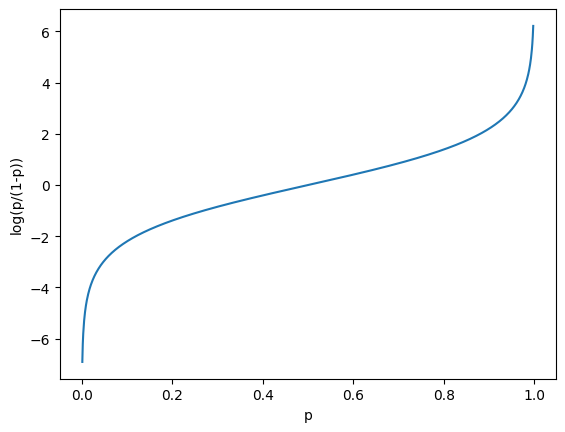

In [4]:
probs= np.arange(0.001, 0.999, 0.001)
odds = [p/(1-p) for p in probs]
logit = np.log(odds)
plt.plot(probs, logit)
plt.xlabel('p')
plt.ylabel('log(p/(1-p))')
plt.show()

#### Logistic Function (sigmoid함수)
- log( p / (1-p) ) = z
- 위의 식을 z에 대해 정리한 식(로지스틱 함수, sigmoid 함수라고도 함)
- logit 함수의 x,y축이 바뀐 모양
$$ p = \frac{1}{(1+e^{-z})}$$

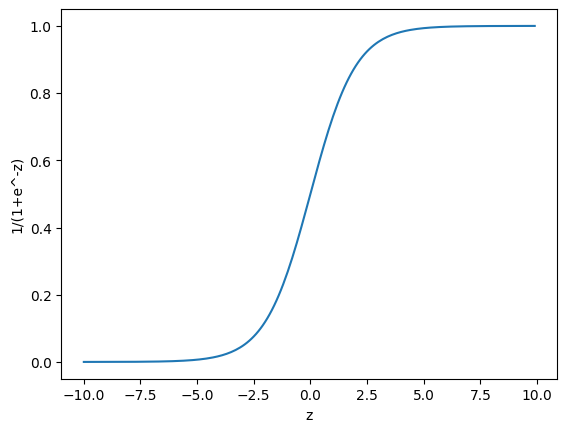

In [5]:
zs = np.arange(-10., 10., 0.1)
gs = [1/(1+np.exp(-z)) for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('1/(1+e^-z)')
plt.show()

## 2) Forge  데이터셋

In [6]:
from matplotlib import pyplot as plt
import mglearn

# forge 데이터셋 생성 (랜덤데이터 만들기)
X, y = mglearn.datasets.make_forge()
X, y

(array([[ 9.96346605,  4.59676542],
        [11.0329545 , -0.16816717],
        [11.54155807,  5.21116083],
        [ 8.69289001,  1.54322016],
        [ 8.1062269 ,  4.28695977],
        [ 8.30988863,  4.80623966],
        [11.93027136,  4.64866327],
        [ 9.67284681, -0.20283165],
        [ 8.34810316,  5.13415623],
        [ 8.67494727,  4.47573059],
        [ 9.17748385,  5.09283177],
        [10.24028948,  2.45544401],
        [ 8.68937095,  1.48709629],
        [ 8.92229526, -0.63993225],
        [ 9.49123469,  4.33224792],
        [ 9.25694192,  5.13284858],
        [ 7.99815287,  4.8525051 ],
        [ 8.18378052,  1.29564214],
        [ 8.7337095 ,  2.49162431],
        [ 9.32298256,  5.09840649],
        [10.06393839,  0.99078055],
        [ 9.50048972, -0.26430318],
        [ 8.34468785,  1.63824349],
        [ 9.50169345,  1.93824624],
        [ 9.15072323,  5.49832246],
        [11.563957  ,  1.3389402 ]]),
 array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 

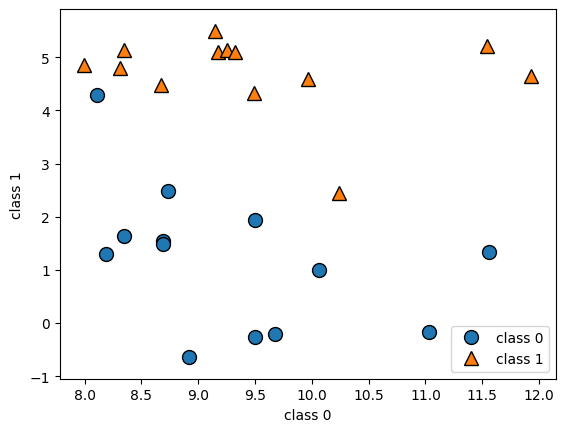

In [7]:
# 산점도 그리기
plt.rcParams['figure.dpi'] = 100
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["class 0", "class 1"], loc=4)
plt.xlabel("class 0")
plt.ylabel("class 1")
plt.show()

In [8]:
#데이터포인트 26개와 특성 2개
X.shape, y.shape

((26, 2), (26,))

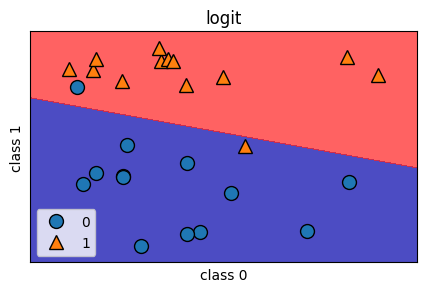

In [9]:
# 분류용 선형 모델(로지스틱 회귀)
# 로지스틱 회귀분석은 회귀분석이 아니라 분류 알고리즘에 해당됨

from sklearn.linear_model import LogisticRegression
fig, axes = plt.subplots(1,1, figsize=(5, 3))
model = LogisticRegression()
model = model.fit(X, y)

#산점도 그리기
mglearn.plots.plot_2d_separator(model, X, fill=True, eps=0.5, ax=axes, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=axes)
axes.set_title("logit")
axes.set_xlabel("class 0")
axes.set_ylabel("class 1")
axes.legend()

결정경계가 직선으로 표현되었고, 위쪽 클래스는 1, 아래쪽 클래스는 0

새로운 데이터가 직선 위에 놓이면 클래스1

반대로 직선 아래쪽에 놓이면 클래스 0

→ 포인트 2개가 잘못 분류됨

In [10]:
model.score(X,y)

0.9230769230769231

In [11]:
from sklearn.metrics import confusion_matrix

pred=model.predict(X)
confusion_matrix(y,pred)

array([[12,  1],
       [ 1, 12]], dtype=int64)

### 5) 로지스틱 회귀모형의 cost

In [12]:
import pandas as pd

df = pd.read_csv("Data/train3.csv")
df.head()

,Survived,Pclass1,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
0,0,0,0,1,1,0,22.0,1,0,7.2500
1,1,1,0,0,0,1,38.0,1,0,71.2833
2,1,0,0,1,0,1,26.0,0,0,7.9250
3,1,1,0,0,0,1,35.0,1,0,53.1000
4,0,0,0,1,1,0,35.0,0,0,8.0500


In [13]:
df.columns

Index(['Survived', 'Pclass1', 'Pclass2', 'Pclass3', 'male', 'female', 'Age',
       'SibSp', 'Parch', 'Fare'],
      dtype='object')

In [14]:
cols = df.columns[1:]
X = df[cols] 
y = df['Survived']

In [15]:
y.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [16]:
# undersampling
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
x_samp = pd.DataFrame(data=X_sample, columns = cols)
y_samp = pd.DataFrame(data=y_sample, columns = ['Survived'])
df2 = pd.concat([x_samp, y_samp], axis = 1)
df2.Survived.value_counts()
X = x_samp[cols]
y = y_samp['Survived']

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1000.0, random_state = 0)   # C: 오차에 대한 패널티
model.fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.7641681901279708, 0.8029197080291971)

In [19]:
pred = model.predict(x_test)
print('전체 샘플수: ', len(y_test))
print('오분류 샘플수: %d' %(y_test != pred).sum())
print('오분류 비율: ', (y_test != pred).sum()/len(y_test))

전체 샘플수:  137
오분류 샘플수: 27
오분류 비율:  0.19708029197080293


In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
print('accuracy: ', accuracy_score(y_test,pred))
print('precision: ', precision_score(y_test,pred))  
print('Recall: ', recall_score(y_test,pred))  
print('f1_score: ',f1_score(y_test,pred))

accuracy:  0.8029197080291971
precision:  0.8059701492537313
Recall:  0.7941176470588235
f1_score:  0.8


#### confusion_matrix

In [21]:
from sklearn.metrics import confusion_matrix
y =    [1, 0, 1, 1, 0, 1]
pred = [0, 0, 1, 1, 0, 1]
confusion_matrix(y, pred)

array([[2, 0],
       [1, 3]], dtype=int64)

                    predict true(1)    predict false(0)
    actual true(1)       TP                FN
    actual false(0)      FP                TN

In [22]:
# TN(True Negative) : 0을 0으로 맞춘 경우
# FP(False Positive) : 0인데 1로 틀린 경우
# FN(False Negative) : 1인데 0으로 틀린 경우
# TP(True Positive) : 1을 1로 맞춘 경우
# ravel() 다차원배열을 1차원배열로 변환

tn,fp,fn,tp = confusion_matrix(y, pred).ravel()
print(tn,fp,fn,tp)

2 0 1 3


In [23]:
# precision(정확도, 정밀도) : 모델이 True라고 분류한 것 중에서 실제 True의 비율  
# tp / (tp+fp)
y =    [0, 1, 0, 0]
pred = [0, 1, 1, 0]
precision_score(y, pred)  # 모델이 2개를 1로 분류하였으나 실제 1인 개수는 1이므로 정밀도는 0.5

0.5

In [24]:
# recall(재현율, 검출율) : 실제값이 True인 것 중에서 모델이 True라고 예측한 것의 비율  
# tp / (tp+fn)
# precision은 모델의 입장에서 recall은 실제 정답의 입장에서(바라보고자 하는 관점이 다름)
# 일반적으로 precision과 recall은 반비례 관계
recall_score(y, pred) # 실제값이 1인 개수 2, 모델이 1로 맞춘 개수 1

1.0

In [25]:
# f1-score : precision과 recall의 조화평균(불균형 데이터셋에 많이 사용하는 평가 지표)
#    2*p*r / p+r
# support : 실제값의 개수(0이 1개, 1이 3개)
# accuracy : 정확도
# macro avg : 단순평균(모든 클래스를 동일한 비중으로 고려)
# weighted avg : 각 클래스에 속하는 표본의 개수로 가중평균(f1-score와 같은 값)

from sklearn.metrics import classification_report
y    = np.array([0, 1, 1, 1])
pred = np.array([0, 1, 0, 0])
print(classification_report(y, pred))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      0.33      0.50         3

    accuracy                           0.50         4
   macro avg       0.67      0.67      0.50         4
weighted avg       0.83      0.50      0.50         4



In [26]:
# Cost : 기본값 1.0
# Cost가 크면 과대적합
# Cost가 낮으면 과소적합
# 실험을 통해 최적의 Cost 값을 얻어내는 코드
costs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
results=[]
for c in costs:
    params = {'C':c, 'max_iter': 1000}
    model = LogisticRegression(**params).fit(x_train, y_train)   # **: dictionary값을 반복해서 돌려라
    score=model.score(x_test,y_test)
    results.append(score)
print(results)    

[0.6496350364963503, 0.781021897810219, 0.8029197080291971, 0.8029197080291971, 0.8029197080291971, 0.8029197080291971, 0.8029197080291971]


최고 정확도: 0.8029197080291971
최적의 C: 0.1


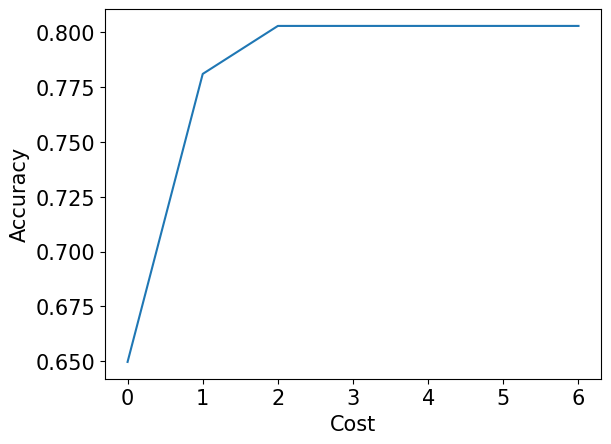

In [27]:
m=max(results)
for i,a in enumerate(results):
    if a==m:
        n=i
        break

print('최고 정확도:',m)
print('최적의 C:',costs[n])
plt.rcParams["font.size"]=15
plt.plot(range(len(costs)), results)
plt.xlabel('Cost')
plt.ylabel('Accuracy')
plt.show()

### 6) 로지스틱 회귀 모형의 class-weight

In [28]:
df = pd.read_csv("Data/iris.csv")
df.head(3)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0


In [29]:
# 처음 40행 제거
df2 = df.drop(df.index[range(40)])

In [30]:
df2.columns[:4]

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'], dtype='object')

In [31]:
cols = df2.columns[:4]
X = df2[cols]
y = df2['Species']
df2.Species.value_counts() 

Species
1    50
2    50
0    10
Name: count, dtype: int64

Text(0.5, 1.0, 'iris\n (0: setosa, 1: versicolor, 2: virginica )')

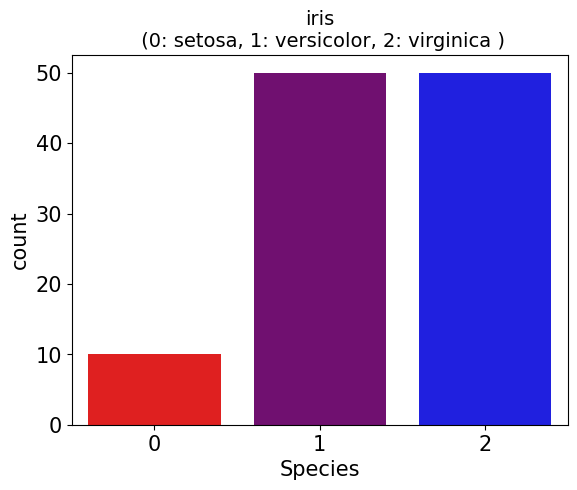

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = ["red", "purple", "blue"]
sns.countplot(x='Species', data=df2, palette=colors)
plt.title('iris\n (0: setosa, 1: versicolor, 2: virginica )', fontsize=14)   #불균형 데이터셋임

In [38]:
# 불균형 데이터셋의 경우 언더샘플링 또는 오버샘플링을 하는 것이 일반적인 방법이지만
# 여기서는 class_weight 속성을 알아보기 위해 샘플링 과정을 생략함

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
y_train.value_counts()

Species
1    40
2    40
0     8
Name: count, dtype: int64

In [39]:
from sklearn.linear_model import LogisticRegression

# 기본 옵션 : 모든 클래스에 1이 부여됨(가중치 없음)
logit1 = LogisticRegression(random_state=0)

# class_weight='balanced': 샘플수에 반비례하는 가중치를 n_samples / (n_classes * np.bincount(y))로 자동 조정
logit2 = LogisticRegression(random_state=0, class_weight='balanced')

# class_weight={}: 가중치를 직접 입력 샘플0을 3배, 샘플1을 1배, 샘플2를 2배
logit3 = LogisticRegression(random_state=0, class_weight={0: 3, 1: 1, 2: 2})

In [40]:
# class_weight='balanced'일 경우 샘플 개수에 반비례하는 가중치가 곱해짐

import numpy as np
print(np.bincount(y)) # 샘플의 개수(10/50/50)

[10 50 50]


In [41]:
len(y_train)

88

In [42]:
# n_samples / (n_classes * np.bincount (y))
print(len(y_train) / (3 * np.bincount(y)))

[2.93333333 0.58666667 0.58666667]


In [43]:
for logit in [logit1,logit2,logit3]:
    logit.fit(X_train, y_train)
    print(logit)
    print("학습용:",logit.score(X_train, y_train))
    print("검증용:",logit.score(X_test, y_test))
    print()   

# logit3 모형은 class 0의 샘플수가 너무 적으므로 경고 메시지가 출력될 수 있음

LogisticRegression(random_state=0)
학습용: 0.9545454545454546
검증용: 1.0

LogisticRegression(class_weight='balanced', random_state=0)
학습용: 0.9545454545454546
검증용: 1.0

LogisticRegression(class_weight={0: 3, 1: 1, 2: 2}, random_state=0)
학습용: 0.9545454545454546
검증용: 1.0



### 7) Penalty 부여
- 회귀계수들이 학습용 데이터에 과적합이 되지 않도록 정규화 요소를 더해주는 기법
- 과적합이 발생할 수 있는 수치에 Penalty를 부여하는 방식
- L1, L2, elasticnet, none
    - L1 : LASSO(Least Absolute Shrinkage Selector Operator) Penalty (편향감소, 변수감소)
        - 오차의 절대값에 penalty 부여
        - 변수들이 많을 경우 실질적으로 영향을 미치는 변수의 개수는 적을 것이라는 가정
        - 영향이 적은 변수들을 0으로 보내서 없애고 영향력이 큰 변수들만 선택
        - 모형을 단순화시켜 해석이 용이함
    - L2 : Ridge Penalty (분산감소)
        - 오차를 제곱한 값에 penalty 부여(일반적으로 사용하는 방식)
        - 변수들 간의 공선성 구조가 있을 때 사용
        - 공선성이 있을 경우 변수는 많지만 실제 사용가능한 정보는 적음
        - 변수들간의 분산을 감소시키는 기능

    - Elasticnet : LASSO와 Ridge의 혼합형 (변수/분산 모두 감소)
        - 변수도 줄이고 분산도 줄이고 싶은 경우에 사용
    - none : penalty를 사용하지 않음

- solver : 최적화(최적의 가중치를 설정)에 사용할 알고리즘( newton-cg, lbfgs, liblinear, sag, saga )
    - lbfgs(Limited Memory Broyden–Fletcher–Goldfarb–Shanno) : 기본값
    - liblinear : small dataset에 적합
    - sag(Stochastic Average Gradient descent), saga(Variant of Sga) : big dataset에 적합
    - newton-cg, saga, lbfgs : multi class 지원

In [44]:
from sklearn.linear_model import LogisticRegression
models = [
    LogisticRegression(random_state=0, penalty='l1', solver='liblinear'),
    LogisticRegression(random_state=0, penalty='l2', max_iter=1000),  #기본옵션
    LogisticRegression(random_state=0, penalty='elasticnet', solver='saga', l1_ratio=1, max_iter=5000),
    LogisticRegression(random_state=0, penalty=None)
]    

for logit in models:
    print(logit)
    logit.fit(X_train, y_train)
    print("학습용:",logit.score(X_train, y_train))
    print("검증용:",logit.score(X_test, y_test))
    print()

LogisticRegression(penalty='l1', random_state=0, solver='liblinear')
학습용: 0.9431818181818182
검증용: 1.0

LogisticRegression(max_iter=1000, random_state=0)
학습용: 0.9545454545454546
검증용: 1.0

LogisticRegression(l1_ratio=1, max_iter=5000, penalty='elasticnet',
                   random_state=0, solver='saga')
학습용: 0.9545454545454546
검증용: 1.0

LogisticRegression(penalty=None, random_state=0)
학습용: 0.9772727272727273
검증용: 1.0

